# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

    

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


<AxesSubplot:>

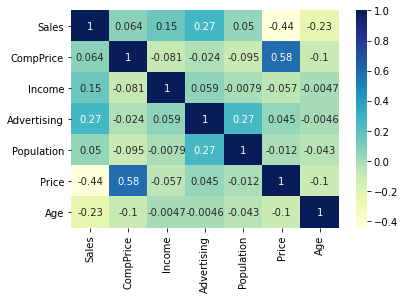

In [32]:
data.corr()

sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### ① Sales (Target) 

In [3]:
data.Sales

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

1) 변수의 비즈니스 의미

> 각지역 판매액 

2) 숫자, 범주?

In [7]:
data.Sales.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

> 숫자

3) NaN 존재 유무 및 조치방안

In [9]:
# Target 이라서 null값이 존재하면 안됨
data.Sales.isnull().sum()

0

- NaN 값은 없다

4) 가변수화 필요 여부

- 가변수화 시킬 필요 없음

5) 기초통계량(수치화)

In [10]:
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

<function matplotlib.pyplot.show(close=None, block=None)>

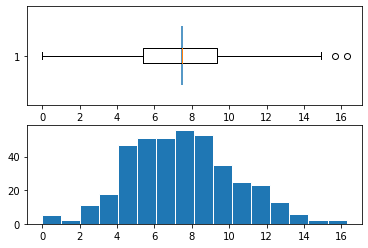

In [17]:
plt.subplot(2,1,1)
plt.boxplot(data.Sales, vert=False)
plt.vlines(data.Sales.mean(),0.7,1.3)

plt.subplot(2,1,2)
plt.hist(data.Sales, edgecolor = 'white',bins = 16)

plt.show

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 정규분포에 가까운 모양을 보여주고있다.
> - 평균적인 매출이 높은 지역과, 낮은 지역의 차이를 비교해야한다.
> - 평균 이하의 매출을 기록한 지역은 3~5 사이에서 큰차이를 보이고있다. 갑자기 많은 차이가 나타나는 이유를 파악해야함
> - 

8) 추가 분석해 볼 사항이 있나요?

> - 매출이 0인 점포에 대해서는 데이터누락등의 요인이 있을것인지 확인 해봐야함 

### ② CompPrice

1) 변수의 비즈니스 의미

> - 경쟁사 제품의 가격

2) 숫자, 범주?

> 숫자형

3) NaN 존재 유무 및 조치방안

In [21]:
data.CompPrice.isnull().sum()

0

> - 없음

4) 가변수화 필요 여부

> - 필요없음

5) 기초통계량(수치화)

In [22]:
data.CompPrice.describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

<function matplotlib.pyplot.show(close=None, block=None)>

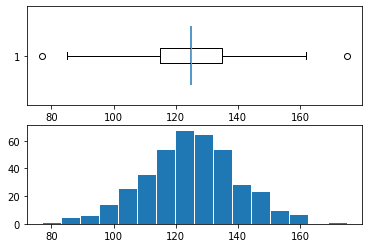

In [23]:
plt.subplot(2,1,1)
plt.boxplot(data.CompPrice, vert=False)
plt.vlines(data.CompPrice.mean(),0.7,1.3)

plt.subplot(2,1,2)
plt.hist(data.CompPrice, edgecolor = 'white',bins = 16)

plt.show

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 정규분포와 비슷한 분포를 가지고있다.
> - 매출보다 자사제품 판매가나 수익성과 관련이 있을수도 있을 것임

8) 추가 분석해 볼 사항이 있나요?

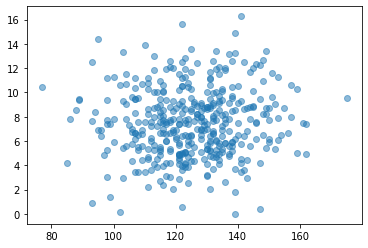

,CompPrice,Sales
CompPrice,1.000000,0.064079
Sales,0.064079,1.000000


In [28]:
plt.scatter(data.CompPrice, data.Sales, alpha=0.5)
plt.show()
data[['CompPrice','Sales']].corr()

# 매출과 경쟁사의 가격은 상관없어보임

### ③ Income

1) 변수의 비즈니스 의미

> - 평균 소득

2) 숫자, 범주?

In [34]:
data.Income.head(10)

0     73
1     48
2     35
3    100
4     64
5    113
6    105
7     81
8    110
9    113
Name: Income, dtype: int64

> - 숫자형

3) NaN 존재 유무 및 조치방안

In [36]:
data.Income.isnull().sum()

0

4) 가변수화 필요 여부

> - 필요없음

5) 기초통계량(수치화)

In [37]:
data.Income.describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

<function matplotlib.pyplot.show(close=None, block=None)>

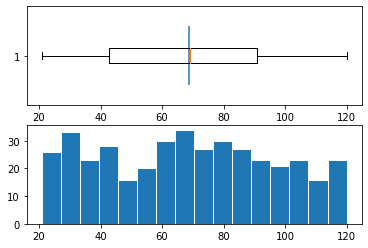

In [38]:
plt.subplot(2,1,1)
plt.boxplot(data.Income, vert=False)
plt.vlines(data.Income.mean(),0.7,1.3)

plt.subplot(2,1,2)
plt.hist(data.Income, edgecolor = 'white',bins = 16)

plt.show

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 상대적으로 소득은 모든구간에서 균등한 모습을 보이고 있다
> - 한 지역의 소득수준도 천차만별일 수 있기 때문에 가격대, 제품의 품질, 고급화 등으로 이루어진 포지셔닝 맵에서 자사가 어디에 위치하는지가 더 중요한 관건일 것으로 추정됨

8) 추가 분석해 볼 사항이 있나요?

> - 지역의 평균소득보다 고객의 소득을 알 수 있다면 더 좋을거같다..

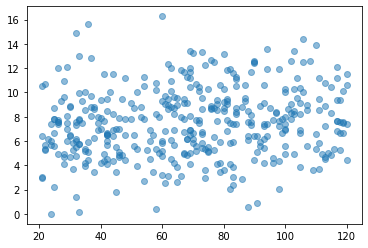

,Income,Sales
Income,1.000000,0.151951
Sales,0.151951,1.000000


In [42]:
plt.scatter(data.Income, data.Sales, alpha=0.5)
plt.show()
data[['Income','Sales']].corr()

# 약한 상관관계가 있음


### ④ Advertising

1) 변수의 비즈니스 의미

> - 광고예산
> - 얼마나 많은 마케팅 비용을 사용하냐

2) 숫자, 범주?

In [47]:
data.Advertising.head(10)

0    11
1    16
2    10
3     4
4     3
5    13
6     0
7    15
8     0
9     0
Name: Advertising, dtype: int64

> - 숫자형

3) NaN 존재 유무 및 조치방안

In [43]:
data.Advertising.isnull().sum()

0

4) 가변수화 필요 여부

> - 필요없음

5) 기초통계량(수치화)

In [44]:
data.Advertising.describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

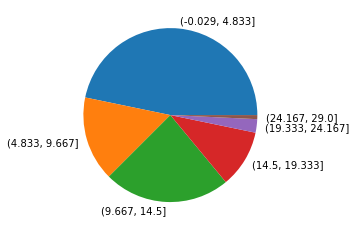

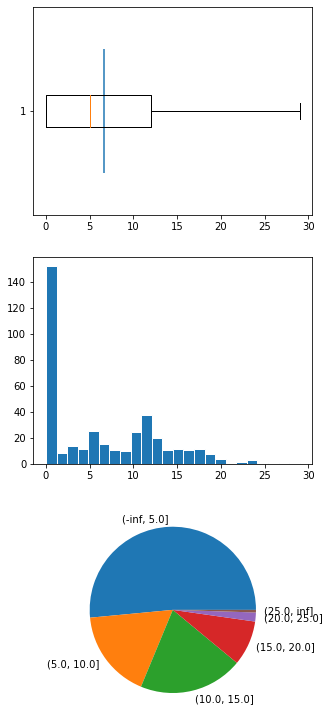

<function matplotlib.pyplot.show(close=None, block=None)>

In [87]:
plt.figure(figsize = (5,13))
plt.subplot(3,1,1)
plt.boxplot(data.Advertising, vert=False)
plt.vlines(data.Advertising.mean(),0.7,1.3)

plt.subplot(3,1,2)
plt.hist(data.Advertising, edgecolor = 'white',bins = 24)

plt.subplot(3,1,3)
temp = pd.cut(data['Advertising'], bins=[-np.inf, 5, 10, 15 ,20,25,np.inf])
temp.groupby(by = temp).agg('count')
plt.pie(temp.groupby(by = temp).agg('count'), labels=temp.groupby(by = temp).agg('count').index)
plt.show()

plt.show

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 광고예산은 0~5 단위의 값을 가지는 지역이 절반이상을 차지한다.
> - 20단위 이상의 광고예산을 사용한 지역을 극소수

8) 추가 분석해 볼 사항이 있나요?

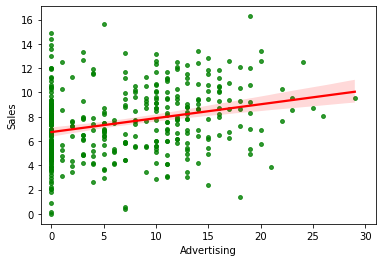

,Advertising,Sales
Advertising,1.000000,0.269507
Sales,0.269507,1.000000


In [106]:
sns.regplot(x='Advertising', y='Sales', data=data, color = 'r', scatter_kws={"s": 15, 'color' : 'g'})

plt.xlim(-1,31)
plt.show()
data[['Advertising','Sales']].corr()

대체적으로 광고예산을 많이 사용할수록 매출도 높아지는 효과를 보이고 있다

### ⑤ Population

In [107]:
data.Population.head(10)

0    276
1    260
2    269
3    466
4    340
5    501
6     45
7    425
8    108
9    131
Name: Population, dtype: int64

1) 변수의 비즈니스 의미

> - 지역인구수

2) 숫자, 범주?

> - 숫자형

3) NaN 존재 유무 및 조치방안

In [108]:
data.Population.isnull().sum()

0

4) 가변수화 필요 여부

> - 해당없음

5) 기초통계량(수치화)

In [109]:
data.Population.describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

<function matplotlib.pyplot.show(close=None, block=None)>

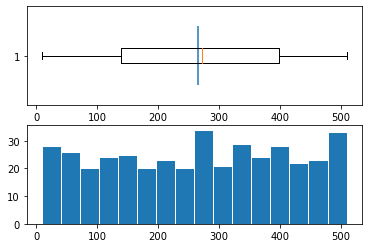

In [110]:
plt.subplot(2,1,1)
plt.boxplot(data.Population, vert=False)
plt.vlines(data.Population.mean(),0.7,1.3)

plt.subplot(2,1,2)
plt.hist(data.Population, edgecolor = 'white',bins = 16)

plt.show

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 인구의 분포는 균등한 것에 비해 매출은 정규분포 모양을 띄고 있는것으로 보아 인구적특성으로 인한 매출효과가 작다고 예상함

8) 추가 분석해 볼 사항이 있나요?

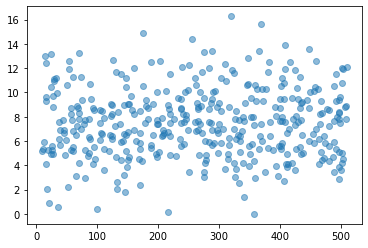

,Population,Sales
Population,1.000000,0.050471
Sales,0.050471,1.000000


In [111]:
plt.scatter(data.Population, data.Sales, alpha=0.5)
plt.show()
data[['Population','Sales']].corr()

In [124]:
data[['Population','Advertising']].corr()

temp = data[['Sales']]
temp['CompPrice*pop'] = data.CompPrice  * data.Population
temp.corr()

# 

<ipython-input-124-de300f923920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['CompPrice*pop'] = data.CompPrice  * data.Population


,Sales,CompPrice*pop
Sales,1.000000,0.063265
CompPrice*pop,0.063265,1.000000


### ⑥ Price

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑩ US

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?